In [97]:
!pip install openpyxl

In [98]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [99]:

df = pd.read_excel("administration_data.xlsx")

# Now you can work with the DataFrame 'df'


In [100]:
df.shape

(1279, 24)

In [101]:
df.columns

Index(['ID_Employee', 'NAME_EMP', 'GENDER', 'ADDRESS', 'MARITAL_STATUS',
       'Grade', 'TYPE_DIPLOMA', 'EXP_YEARS', 'EMAIL', 'LANGUAGE', 'extra_hour',
       'POSITION', 'SALARY', 'STARTING_DATE', 'REGISTRATION_NUMBER',
       'TYPE_CONTRACT', 'DEP_ID', 'LEAVE_CONSUMED', 'LEAVE_BALANCE',
       'CONTRACT_START', 'CONTRACT_END', 'TENURE', 'LAST_LEAVE_TYPE',
       'SOURCE_of_employment'],
      dtype='object')

**explanation of each feature:**


1. **ID_Employee**: This column likely contains a unique identifier for each employee, allowing for easy reference and identification.

2. **NAME_EMP**: This column contains the names of the employees.

3. **GENDER**: This column indicates the gender of the employees, usually categorized as male, female, or other.

4. **ADDRESS**: This column holds the addresses of the employees, specifying their place of residence or work.

5. **MARITAL_STATUS**: This column records the marital status of the employees, which could be single, married, divorced, etc.

6. **Grade**: This column might represent the job grades or levels of the employees within the organization, indicating their seniority or rank.

7. **TYPE_DIPLOMA**: This column could specify the type of diploma or educational qualification held by each employee.

8. **EXP_YEARS**: This column typically denotes the number of years of experience the employee has in their field.

9. **EMAIL**: This column contains the email addresses of the employees, often used for communication within the organization.

10. **LANGUAGE**: This column might indicate the language proficiency of the employees, specifying the languages they can speak or understand.

11. **extra_hour**: This column could represent the number of extra hours worked by employees, often used for calculating overtime pay.

12. **POSITION**: This column specifies the job positions or roles held by the employees within the organization.

13. **SALARY**: This column contains the salaries or wages earned by the employees, indicating their compensation for work.

14. **STARTING_DATE**: This column records the starting dates of employment for each employee, indicating when they joined the organization.

15. **REGISTRATION_NUMBER**: This column might contain unique registration numbers assigned to each employee for administrative purposes.

16. **TYPE_CONTRACT**: This column specifies the type of contract (e.g., permanent, temporary) under which the employee is employed.

17. **DEP_ID**: This column could represent the department IDs to which the employees belong, indicating their organizational unit.

18. **LEAVE_CONSUMED**: This column might track the amount of leave consumed by each employee, indicating their time off from work.

19. **LEAVE_BALANCE**: This column could represent the remaining balance of leave days available to each employee.

20. **CONTRACT_START**: This column records the start dates of employment contracts for employees.

21. **CONTRACT_END**: This column denotes the end dates of employment contracts for employees.

22. **TENURE**: This column might calculate the tenure of each employee, indicating the duration of their employment within the organization.

23. **LAST_LEAVE_TYPE**: This column could specify the type of the last leave taken by each employee, such as vacation, sick leave, etc.

24. **SOURCE_of_employment**: This column could indicate the source or method through which the employees were recruited or employed, such as direct hire, referral, recruitment agency, etc.

In [102]:
# Calculate the total number of rows in the DataFrame
total_rows = df.shape[0]

# Calculate the number of missing values (NaN) for each feature
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each feature
percentage_missing = (missing_values / total_rows) * 100

# Create a DataFrame to store the results
missing_data_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})

# Display the DataFrame
print(missing_data_info)

                      Missing Values  Percentage
ID_Employee                        0    0.000000
NAME_EMP                           0    0.000000
GENDER                             0    0.000000
ADDRESS                            0    0.000000
MARITAL_STATUS                     0    0.000000
Grade                              0    0.000000
TYPE_DIPLOMA                       0    0.000000
EXP_YEARS                          0    0.000000
EMAIL                              0    0.000000
LANGUAGE                           0    0.000000
extra_hour                         0    0.000000
POSITION                           0    0.000000
SALARY                             0    0.000000
STARTING_DATE                      0    0.000000
REGISTRATION_NUMBER                0    0.000000
TYPE_CONTRACT                      0    0.000000
DEP_ID                             0    0.000000
LEAVE_CONSUMED                     0    0.000000
LEAVE_BALANCE                      0    0.000000
CONTRACT_START      

In [103]:
# List of features considered relevant for predictive modeling
relevant_features = ['GENDER', 'MARITAL_STATUS','SALARY', 'Grade', 'TYPE_DIPLOMA', 'EXP_YEARS', 'LANGUAGE', 'extra_hour', 
                     'POSITION', 'TYPE_CONTRACT', 'DEP_ID', 'LEAVE_CONSUMED', 'LEAVE_BALANCE', 
                     'TENURE', 'SOURCE_of_employment']

# Create a new DataFrame with only the relevant features
df_relevant = df[relevant_features].copy()

# Display the first few rows of the new DataFrame
print(df_relevant.shape)

(1279, 15)


In [104]:
df_relevant

,GENDER,MARITAL_STATUS,SALARY,Grade,TYPE_DIPLOMA,EXP_YEARS,LANGUAGE,extra_hour,POSITION,TYPE_CONTRACT,DEP_ID,LEAVE_CONSUMED,LEAVE_BALANCE,TENURE,SOURCE_of_employment
0,F,0,2271,RH,Master,17,"Arabe, Others",154,Administration,CDD,DEP_ADMIN00,13,17,1,Free Application
1,F,0,3357,RH,Licence,8,Anglais,51,Administration,CIVP,DEP_ADMIN00,2,26,1,Recommendation
2,M,1,3726,Financier,Licence,11,"Arabe, Anglais, Others",5,Administration,CDI,DEP_ADMIN00,4,28,1,Recommendation
3,M,0,1415,Financier,Licence,1,"Anglais, Others, Arabe",160,Administration,CDI,DEP_ADMIN00,22,4,1,Free Application
4,M,0,4972,Chef Service,Licence,11,"Anglais, Arabe, Francais",6,Administration,CDD,DEP_ADMIN00,27,10,0,Recommendation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,F,0,4595,Director,Master,16,"Francais, Arabe, Anglais",160,Administration,CDI,DEP_ADMIN00,13,14,0,Recruitment Session
1275,M,0,4604,RH,Licence,2,Others,114,Administration,CDI,DEP_ADMIN00,22,29,1,Recommendation
1276,F,0,3643,RH,Licence,20,"Arabe, Francais, Others",116,Administration,CIVP,DEP_ADMIN00,8,12,1,Recommendation
1277,F,1,3731,Director,Licence,19,"Anglais, Others, Arabe, Francais",73,Administration,CDD,DEP_ADMIN00,26,18,1,Recommendation


In [105]:
# Calculate the number of missing values for each feature
missing_values_per_feature = df_relevant.isnull().sum()

# Display the missing values for each feature
print("Missing Values per Feature:")
print(missing_values_per_feature)

Missing Values per Feature:
GENDER                  0
MARITAL_STATUS          0
SALARY                  0
Grade                   0
TYPE_DIPLOMA            0
EXP_YEARS               0
LANGUAGE                0
extra_hour              0
POSITION                0
TYPE_CONTRACT           0
DEP_ID                  0
LEAVE_CONSUMED          0
LEAVE_BALANCE           0
TENURE                  0
SOURCE_of_employment    0
dtype: int64


In [106]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
categorical_columns = df_relevant.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df_relevant[col] = label_encoder.fit_transform(df_relevant[col])

df_relevant

,GENDER,MARITAL_STATUS,SALARY,Grade,TYPE_DIPLOMA,EXP_YEARS,LANGUAGE,extra_hour,POSITION,TYPE_CONTRACT,DEP_ID,LEAVE_CONSUMED,LEAVE_BALANCE,TENURE,SOURCE_of_employment
0,0,0,2271,4,2,17,27,154,0,0,0,13,17,1,0
1,0,0,3357,4,1,8,0,51,0,2,0,2,26,1,1
2,1,1,3726,3,1,11,20,5,0,1,0,4,28,1,1
3,1,0,1415,3,1,1,12,160,0,1,0,22,4,1,0
4,1,0,4972,0,1,11,2,6,0,0,0,27,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0,0,4595,2,2,16,39,160,0,1,0,13,14,0,2
1275,1,0,4604,4,1,2,48,114,0,1,0,22,29,1,1
1276,0,0,3643,4,1,20,25,116,0,2,0,8,12,1,1
1277,0,1,3731,2,1,19,13,73,0,0,0,26,18,1,1


In [107]:
# Get the number of unique values for each column
unique_values_count = df_relevant.nunique()

# Display the number of unique values for each column
print("Number of Unique Values for Each Column:")
print(unique_values_count)

Number of Unique Values for Each Column:
GENDER                     2
MARITAL_STATUS             2
SALARY                  1101
Grade                      5
TYPE_DIPLOMA               3
EXP_YEARS                 21
LANGUAGE                  64
extra_hour               199
POSITION                   1
TYPE_CONTRACT              3
DEP_ID                     1
LEAVE_CONSUMED            31
LEAVE_BALANCE             31
TENURE                     2
SOURCE_of_employment       3
dtype: int64


In [108]:
df = df_relevant.drop(columns=['POSITION', 'DEP_ID'])

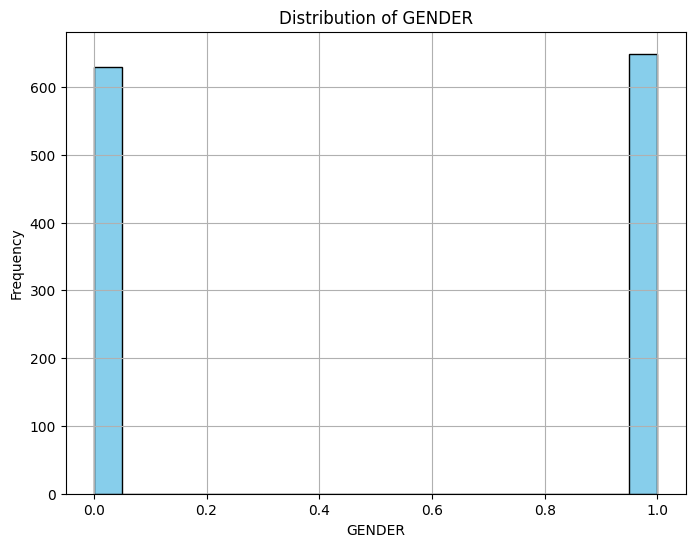

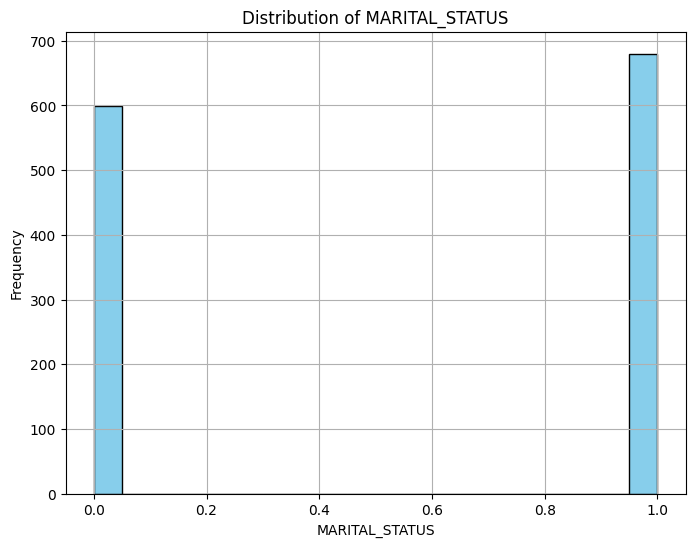

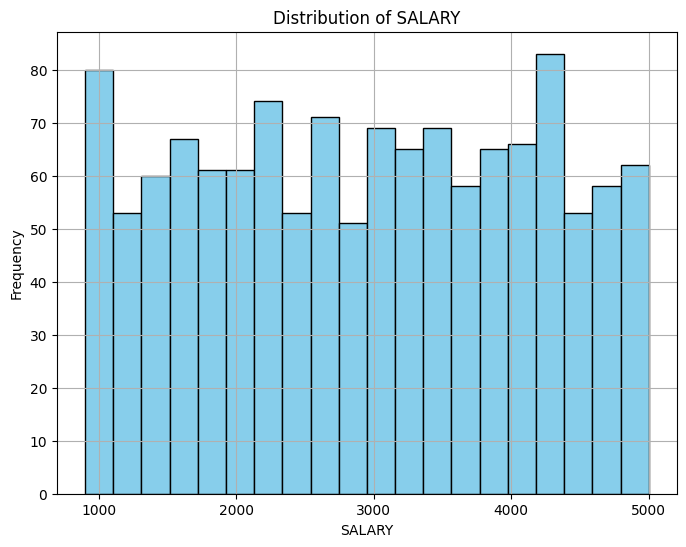

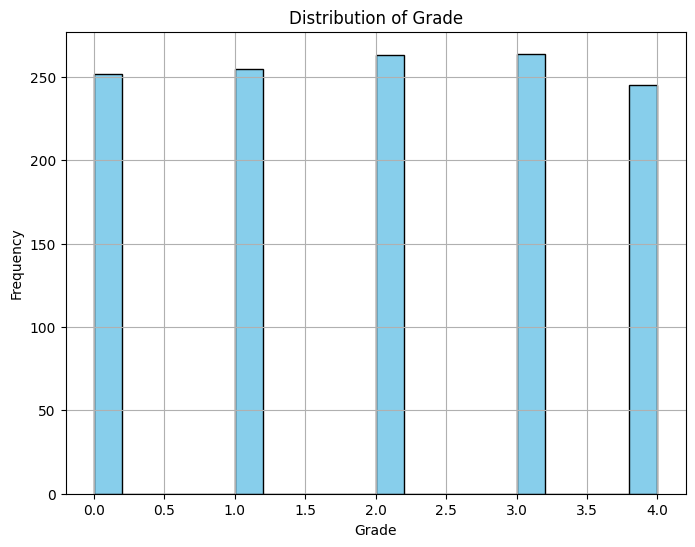

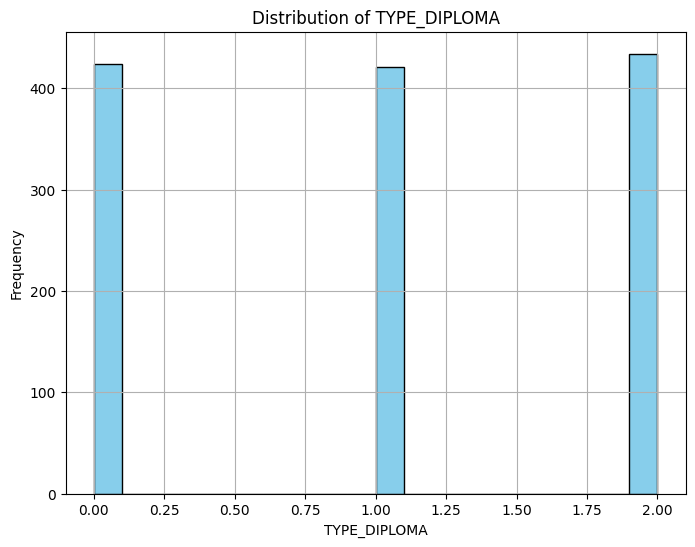

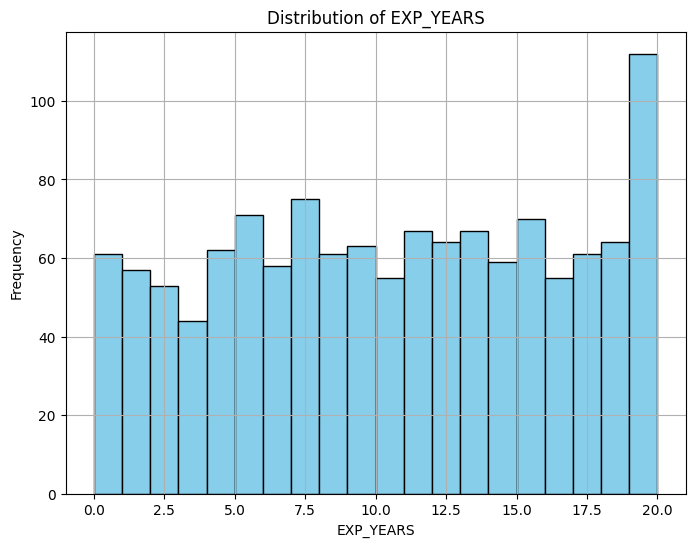

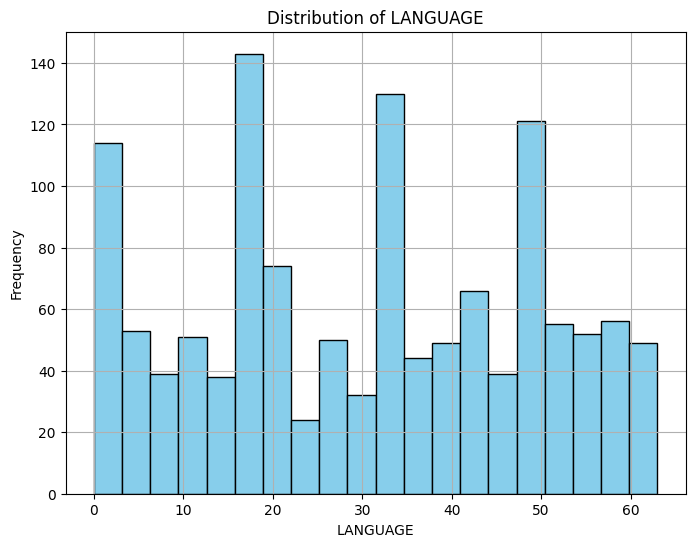

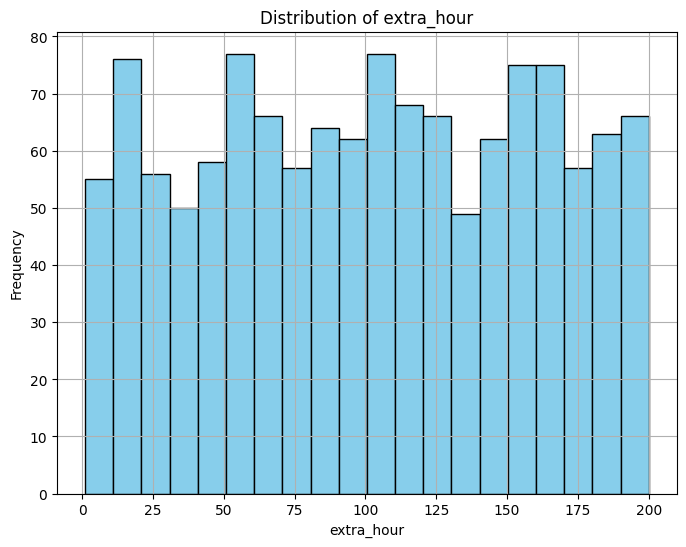

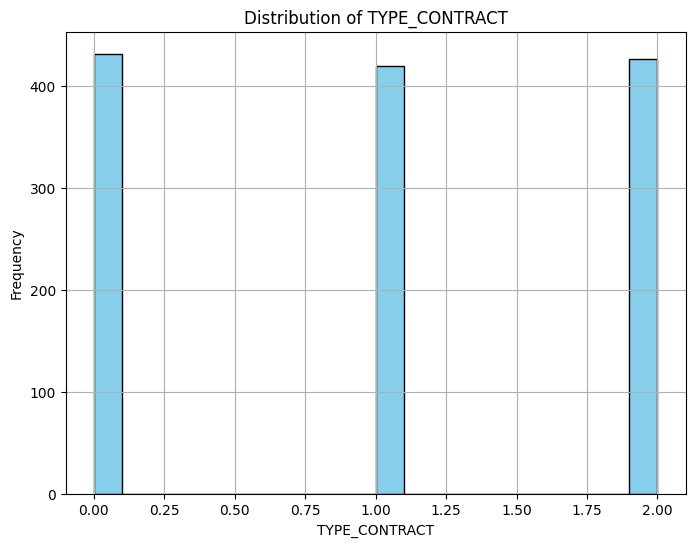

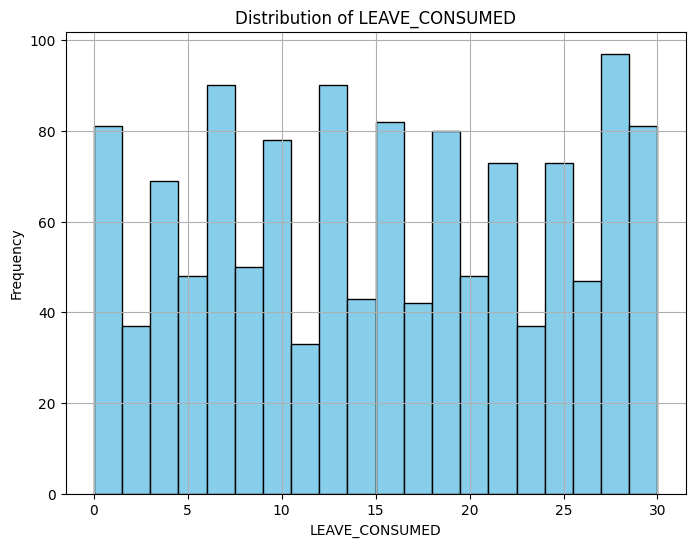

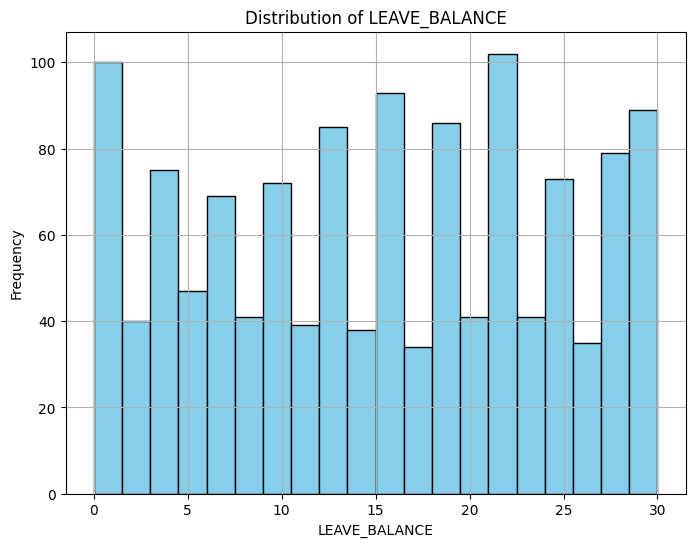

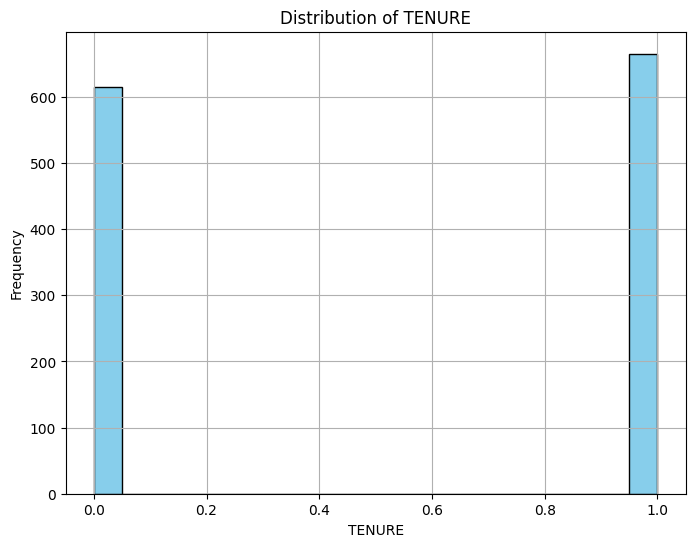

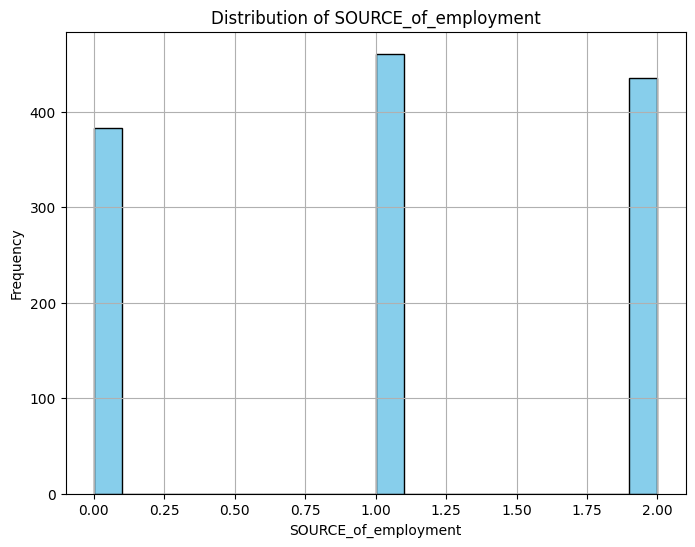

In [109]:
import matplotlib.pyplot as plt

def plot_distribution(df, feature_name):
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature_name], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Loop through the first 12 columns of the DataFrame
for column in df.columns[:]:
    plot_distribution(df, column)

In [110]:
df.columns

Index(['GENDER', 'MARITAL_STATUS', 'SALARY', 'Grade', 'TYPE_DIPLOMA',
       'EXP_YEARS', 'LANGUAGE', 'extra_hour', 'TYPE_CONTRACT',
       'LEAVE_CONSUMED', 'LEAVE_BALANCE', 'TENURE', 'SOURCE_of_employment'],
      dtype='object')

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with the relevant features and the target variable 'SALARY'

# Separate features (X) and target variable (y)
X = df.drop(columns=['SALARY'])
y = df['SALARY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Initialize and train Random Forest Regression model
rf_reg_model = RandomForestRegressor(random_state=42)
rf_reg_model.fit(X_train, y_train)

# Predictions
linear_reg_pred = linear_reg_model.predict(X_test)
rf_reg_pred = rf_reg_model.predict(X_test)

# Calculate Mean Squared Error for each model
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)

# Print Mean Squared Error for each model
print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("Random Forest Regression Mean Squared Error:", rf_reg_mse)


Linear Regression Mean Squared Error: 1355081.5210089027
Random Forest Regression Mean Squared Error: 1363681.1662320313


In [112]:
df

,GENDER,MARITAL_STATUS,SALARY,Grade,TYPE_DIPLOMA,EXP_YEARS,LANGUAGE,extra_hour,TYPE_CONTRACT,LEAVE_CONSUMED,LEAVE_BALANCE,TENURE,SOURCE_of_employment
0,0,0,2271,4,2,17,27,154,0,13,17,1,0
1,0,0,3357,4,1,8,0,51,2,2,26,1,1
2,1,1,3726,3,1,11,20,5,1,4,28,1,1
3,1,0,1415,3,1,1,12,160,1,22,4,1,0
4,1,0,4972,0,1,11,2,6,0,27,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0,0,4595,2,2,16,39,160,1,13,14,0,2
1275,1,0,4604,4,1,2,48,114,1,22,29,1,1
1276,0,0,3643,4,1,20,25,116,2,8,12,1,1
1277,0,1,3731,2,1,19,13,73,0,26,18,1,1


In [113]:

# Features for the new data
new_data = pd.DataFrame({
    'GENDER': [0],  # example value
    'MARITAL_STATUS': [0],  # example value
    'Grade': [4],  # example value
    'TYPE_DIPLOMA': [2],  # example value
    'EXP_YEARS': [17],  # example value
    'LANGUAGE': [27],  # example value
    'extra_hour': [154],  # example value
    'TYPE_CONTRACT': [0],  # example value
    'LEAVE_CONSUMED': [13],  # example value
    'LEAVE_BALANCE': [17],  # example value
    'TENURE': [1],  # example value
    'SOURCE_of_employment': [0]  # example value
})



# Predict salary for the new data
new_salary_prediction_rf = rf_reg_model.predict(new_data)
new_salary_prediction_linear = linear_reg_model.predict(new_data)
# Print the predicted salary
print("Predicted Salary:", new_salary_prediction_rf)
print("Predicted Salary:", new_salary_prediction_linear)


Predicted Salary: [2732.84]
Predicted Salary: [3025.75209723]
